In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.spatial import distance
import math

%matplotlib inline

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_facial_landmarks(gray):
    face_rects = detector(gray, 1)
    face_landmarks = predictor(image, face_rects[0])
    face_landmarks = np.array([[p.x, p.y] for p in face_landmarks.parts()])
    return face_landmarks

def eye_aspect_ratio(eye_landmarks):
    # Calculate the distances between the horizontal eye landmarks
    A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
    B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
    C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])

    # Calculate the Eye Aspect Ratio (EAR)
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth_landmarks):
    # Calculate the distances between the vertical mouth landmarks
    A = np.linalg.norm(mouth_landmarks[13] - mouth_landmarks[19])
    B = np.linalg.norm(mouth_landmarks[14] - mouth_landmarks[18])
    C = np.linalg.norm(mouth_landmarks[15] - mouth_landmarks[17])
    D = np.linalg.norm(mouth_landmarks[12] - mouth_landmarks[16])

    # Calculate the Mouth Aspect Ratio (MAR)
    mar = (A + B + C) / (2.0 * D)
    return mar

def facial_asymmetry(facial_landmarks):
    # Calculate the center of the face by averaging the landmarks
    face_center = np.mean(facial_landmarks, axis=0)

    # Calculate the distances between each landmark and the face center
    distances = np.linalg.norm(facial_landmarks - face_center, axis=1)

    # Calculate the facial asymmetry as the standard deviation of the distances
    asymmetry = np.std(distances)
    return asymmetry

def get_features(land_marks):
    eye_landmarks = face_landmarks[36:42]
    mouth_landmarks = face_landmarks[48:68]
    ear = eye_aspect_ratio(eye_landmarks)
    mar = mouth_aspect_ratio(mouth_landmarks)
    fa = facial_asymmetry(face_landmarks)
    
    return ear, mar, fa

In [4]:
np.array([-1])

array([-1])

In [5]:
data_dict = {
    "EAR":[],
    "MAR":[],
    "FA":[],
    "LABEL":[]
    }

In [6]:
pd.DataFrame(data_dict)

,EAR,MAR,FA,LABEL


In [18]:
dirname = ["0","10"]
LABELS = [0,10]
for label in LABELS:
    direc = ""
    if label == 0:
        direc = dirname[0]    else:
        direc = dirname[1]
    for file in os.listdir(dirc):
    #     print(os.path.join(dirname, file))
        image = cv.imread(os.path.join(dirc, file))
        lmarks = get_facial_landmarks(get_gray(image))
        ear, mar, fa = get_features(land_marks)
        data_dict["EAR"].append(ear)
        data_dict["EMAR"].append(mar)
        data_dict["FA"].append(fa)
        if label == 0:
            data_dict["LABEL"].append(0)
        else:
            data_dict["LABEL"].append(10)

0/8285.jpg
0/12368.jpg
0/3666.jpg
0/12083.jpg
0/918.jpg
0/10417.jpg
0/12658.jpg
0/1453.jpg
0/3068.jpg
0/3184.jpg
0/1078.jpg
0/11685.jpg
0/123.jpg
0/12012.jpg
0/9798.jpg
0/844.jpg
0/11045.jpg
0/2287.jpg
0/11736.jpg
0/9603.jpg
0/12247.jpg
0/3080.jpg
0/1259.jpg
0/11688.jpg
0/8265.jpg
0/8154.jpg
0/7527.jpg
0/9939.jpg
0/391.jpg
0/12455.jpg
0/5545.jpg
0/1958.jpg
0/1500.jpg
0/8680.jpg
0/5187.jpg
0/10862.jpg
0/6191.jpg
0/5286.jpg
0/6101.jpg
0/10214.jpg
0/4954.jpg
0/13419.jpg
0/9011.jpg
0/10010.jpg
0/7614.jpg
0/9223.jpg
0/12766.jpg
0/12077.jpg
0/9872.jpg
0/11598.jpg
0/7197.jpg
0/3294.jpg
0/6898.jpg
0/969.jpg
0/5813.jpg
0/12483.jpg
0/5002.jpg
0/7705.jpg
0/7191.jpg
0/3774.jpg
0/2603.jpg
0/4996.jpg
0/495.jpg
0/1125.jpg
0/10174.jpg
0/10812.jpg
0/9620.jpg
0/5920.jpg
0/8651.jpg
0/12623.jpg
0/6737.jpg
0/12999.jpg
0/1947.jpg
0/7987.jpg
0/11673.jpg
0/8978.jpg
0/2134.jpg
0/7812.jpg
0/4569.jpg
0/9815.jpg
0/13298.jpg
0/9885.jpg
0/11343.jpg
0/3771.jpg
0/9107.jpg
0/4835.jpg
0/986.jpg
0/1109.jpg
0/5108.jpg
0/

0/1957.jpg
0/11281.jpg
0/7460.jpg
0/10317.jpg
0/13312.jpg
0/8298.jpg
0/3369.jpg
0/13317.jpg
0/11903.jpg
0/82.jpg
0/3123.jpg
0/273.jpg
0/11836.jpg
0/5598.jpg
0/7399.jpg
0/1889.jpg
0/202.jpg
0/9235.jpg
0/2056.jpg
0/4584.jpg
0/9285.jpg
0/705.jpg
0/5984.jpg
0/6163.jpg
0/11698.jpg
0/10765.jpg
0/2245.jpg
0/10451.jpg
0/11883.jpg
0/2538.jpg
0/2551.jpg
0/9829.jpg
0/8803.jpg
0/5556.jpg
0/7401.jpg
0/4627.jpg
0/9729.jpg
0/6970.jpg
0/4008.jpg
0/8884.jpg
0/2729.jpg
0/8922.jpg
0/102.jpg
0/9695.jpg
0/3703.jpg
0/13461.jpg
0/13104.jpg
0/8252.jpg
0/1669.jpg
0/11603.jpg
0/10707.jpg
0/10658.jpg
0/5853.jpg
0/7213.jpg
0/7181.jpg
0/13224.jpg
0/10554.jpg
0/12220.jpg
0/12734.jpg
0/9530.jpg
0/7510.jpg
0/10982.jpg
0/6659.jpg
0/1757.jpg
0/4004.jpg
0/2388.jpg
0/3892.jpg
0/2369.jpg
0/5681.jpg
0/8402.jpg
0/11629.jpg
0/2858.jpg
0/12732.jpg
0/13387.jpg
0/8754.jpg
0/5411.jpg
0/9238.jpg
0/8414.jpg
0/2556.jpg
0/2016.jpg
0/6383.jpg
0/2068.jpg
0/4283.jpg
0/3501.jpg
0/12821.jpg
0/5189.jpg
0/168.jpg
0/2333.jpg
0/8167.jpg
0/19

0/2178.jpg
0/5898.jpg
0/10436.jpg
0/5144.jpg
0/5918.jpg
0/823.jpg
0/4331.jpg
0/8682.jpg
0/8149.jpg
0/4081.jpg
0/520.jpg
0/2817.jpg
0/10565.jpg
0/3578.jpg
0/8433.jpg
0/2631.jpg
0/6942.jpg
0/7203.jpg
0/4163.jpg
0/7650.jpg
0/9410.jpg
0/12913.jpg
0/7605.jpg
0/9357.jpg
0/3824.jpg
0/10499.jpg
0/8289.jpg
0/10610.jpg
0/5409.jpg
0/7810.jpg
0/2946.jpg
0/4574.jpg
0/5766.jpg
0/8882.jpg
0/1918.jpg
0/3819.jpg
0/6223.jpg
0/9439.jpg
0/1950.jpg
0/6419.jpg
0/11827.jpg
0/2468.jpg
0/580.jpg
0/4386.jpg
0/836.jpg
0/7927.jpg
0/3326.jpg
0/3113.jpg
0/6595.jpg
0/9627.jpg
0/10418.jpg
0/7247.jpg
0/9063.jpg
0/12286.jpg
0/3463.jpg
0/1672.jpg
0/2154.jpg
0/353.jpg
0/10951.jpg
0/10445.jpg
0/1520.jpg
0/10336.jpg
0/5371.jpg
0/5009.jpg
0/3746.jpg
0/4045.jpg
0/1882.jpg
0/2647.jpg
0/8516.jpg
0/566.jpg
0/127.jpg
0/10801.jpg
0/12849.jpg
0/8735.jpg
0/5566.jpg
0/4673.jpg
0/818.jpg
0/12345.jpg
0/11307.jpg
0/1642.jpg
0/5637.jpg
0/3954.jpg
0/13470.jpg
0/8486.jpg
0/7482.jpg
0/13302.jpg
0/3663.jpg
0/7493.jpg
0/10973.jpg
0/6075.jpg


0/10535.jpg
0/6569.jpg
0/3728.jpg
0/11701.jpg
0/5946.jpg
0/9028.jpg
0/7043.jpg
0/10313.jpg
0/1873.jpg
0/8201.jpg
0/2069.jpg
0/13313.jpg
0/11440.jpg
0/8767.jpg
0/7492.jpg
0/7235.jpg
0/11180.jpg
0/9475.jpg
0/10412.jpg
0/370.jpg
0/5014.jpg
0/7806.jpg
0/4457.jpg
0/4257.jpg
0/12810.jpg
0/11919.jpg
0/9568.jpg
0/6900.jpg
0/2668.jpg
0/9138.jpg
0/2060.jpg
0/2988.jpg
0/8051.jpg
0/4021.jpg
0/12221.jpg
0/132.jpg
0/11614.jpg
0/594.jpg
0/6857.jpg
0/8425.jpg
0/5634.jpg
0/3386.jpg
0/7368.jpg
0/4089.jpg
0/1805.jpg
0/6226.jpg
0/9416.jpg
0/2423.jpg
0/13080.jpg
0/3045.jpg
0/10594.jpg
0/778.jpg
0/6183.jpg
0/12243.jpg
0/12535.jpg
0/2591.jpg
0/10839.jpg
0/7296.jpg
0/11732.jpg
0/413.jpg
0/677.jpg
0/7053.jpg
0/12244.jpg
0/9503.jpg
0/3926.jpg
0/175.jpg
0/500.jpg
0/11759.jpg
0/11183.jpg
0/2183.jpg
0/10229.jpg
0/10319.jpg
0/6703.jpg
0/12542.jpg
0/11895.jpg
0/2171.jpg
0/3255.jpg
0/9535.jpg
0/5499.jpg
0/9101.jpg
0/10885.jpg
0/489.jpg
0/1877.jpg
0/7157.jpg
0/10060.jpg
0/7172.jpg
0/11545.jpg
0/5548.jpg
0/3683.jpg
0/6

0/11828.jpg
0/12090.jpg
0/8293.jpg
0/5541.jpg
0/12554.jpg
0/6489.jpg
0/10629.jpg
0/9342.jpg
0/12028.jpg
0/11395.jpg
0/8733.jpg
0/11574.jpg
0/5621.jpg
0/13051.jpg
0/548.jpg
0/8880.jpg
0/13315.jpg
0/11355.jpg
0/10840.jpg
0/5074.jpg
0/2763.jpg
0/199.jpg
0/4846.jpg
0/11668.jpg
0/2079.jpg
0/9498.jpg
0/2853.jpg
0/8989.jpg
0/6392.jpg
0/12954.jpg
0/10592.jpg
0/4740.jpg
0/12209.jpg
0/12595.jpg
0/8544.jpg
0/2759.jpg
0/6516.jpg
0/8939.jpg
0/11114.jpg
0/5730.jpg
0/2697.jpg
0/6583.jpg
0/6905.jpg
0/11774.jpg
0/7295.jpg
0/7171.jpg
0/7453.jpg
0/12852.jpg
0/10881.jpg
0/4557.jpg
0/12190.jpg
0/5755.jpg
0/4822.jpg
0/8140.jpg
0/13323.jpg
0/2918.jpg
0/12611.jpg
0/5161.jpg
0/3857.jpg
0/819.jpg
0/11252.jpg
0/4032.jpg
0/727.jpg
0/5407.jpg
0/6964.jpg
0/9766.jpg
0/10966.jpg
0/2642.jpg
0/4807.jpg
0/9938.jpg
0/3785.jpg
0/10866.jpg
0/10072.jpg
0/10508.jpg
0/8350.jpg
0/9126.jpg
0/13304.jpg
0/6660.jpg
0/8258.jpg
0/5865.jpg
0/5989.jpg
0/11424.jpg
0/8423.jpg
0/4069.jpg
0/3477.jpg
0/11289.jpg
0/5606.jpg
0/6939.jpg
0/98.

0/13035.jpg
0/6134.jpg
0/9593.jpg
0/3004.jpg
0/12564.jpg
0/6098.jpg
0/3274.jpg
0/7986.jpg
0/10401.jpg
0/4098.jpg
0/5756.jpg
0/4710.jpg
0/5201.jpg
0/3535.jpg
0/2507.jpg
0/606.jpg
0/6124.jpg
0/1849.jpg
0/5505.jpg
0/5994.jpg
0/10125.jpg
0/7310.jpg
0/5834.jpg
0/3044.jpg
0/7883.jpg
0/6059.jpg
0/275.jpg
0/7443.jpg
0/5133.jpg
0/11520.jpg
0/11720.jpg
0/11773.jpg
0/2360.jpg
0/11204.jpg
0/3076.jpg
0/13087.jpg
0/2959.jpg
0/2709.jpg
0/12217.jpg
0/6110.jpg
0/11467.jpg
0/239.jpg
0/12930.jpg
0/2945.jpg
0/12947.jpg
0/4352.jpg
0/3266.jpg
0/9790.jpg
0/12829.jpg
0/4333.jpg
0/10216.jpg
0/10398.jpg
0/9644.jpg
0/6888.jpg
0/10720.jpg
0/11418.jpg
0/12151.jpg
0/1978.jpg
0/9850.jpg
0/5673.jpg
0/8367.jpg
0/2390.jpg
0/1963.jpg
0/11763.jpg
0/10661.jpg
0/8153.jpg
0/7690.jpg
0/7832.jpg
0/7988.jpg
0/6673.jpg
0/13168.jpg
0/4789.jpg
0/2404.jpg
0/5580.jpg
0/379.jpg
0/178.jpg
0/5611.jpg
0/8023.jpg
0/11878.jpg
0/9259.jpg
0/689.jpg
0/3353.jpg
0/9429.jpg
0/9772.jpg
0/538.jpg
0/2055.jpg
0/9897.jpg
0/8450.jpg
0/3507.jpg
0/892

0/10959.jpg
0/3390.jpg
0/11755.jpg
0/4977.jpg
0/2537.jpg
0/4095.jpg
0/11356.jpg
0/7376.jpg
0/3805.jpg
0/2796.jpg
0/11293.jpg
0/4559.jpg
0/7051.jpg
0/12293.jpg
0/4239.jpg
0/8000.jpg
0/7421.jpg
0/2925.jpg
0/7410.jpg
0/337.jpg
0/9394.jpg
0/7720.jpg
0/9918.jpg
0/2109.jpg
0/9550.jpg
0/1878.jpg
0/584.jpg
0/567.jpg
0/6923.jpg
0/12005.jpg
0/10583.jpg
0/10069.jpg
0/7231.jpg
0/13202.jpg
0/9776.jpg
0/4717.jpg
0/7639.jpg
0/.ipynb_checkpoints
0/5585.jpg
0/5361.jpg
0/8165.jpg
0/4678.jpg
0/11378.jpg
0/10393.jpg
0/8874.jpg
0/9046.jpg
0/11594.jpg
0/4793.jpg
0/7270.jpg
0/9281.jpg
0/5479.jpg
0/4772.jpg
0/8636.jpg
0/2908.jpg
0/4617.jpg
0/396.jpg
0/8500.jpg
0/12456.jpg
0/8725.jpg
0/4349.jpg
0/8182.jpg
0/6574.jpg
0/8136.jpg
0/2989.jpg
0/2976.jpg
0/2.jpg
0/7809.jpg
0/10327.jpg
0/12998.jpg
0/4572.jpg
0/7831.jpg
0/10127.jpg
0/2053.jpg
0/11198.jpg
0/8660.jpg
0/11496.jpg
0/9395.jpg
0/12418.jpg
0/3921.jpg
0/13426.jpg
0/8302.jpg
0/7389.jpg
0/575.jpg
0/1901.jpg
0/214.jpg
0/8841.jpg
0/13397.jpg
0/2929.jpg
0/4635.jpg

In [27]:
np.array

<function numpy.array>

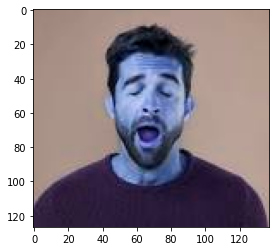

In [7]:
plt.imshow(cv2.imread("def.jpeg"))

In [8]:
image = cv2.imread("def.jpeg")

gray = get_gray(image)

In [9]:
face_rects = detector(gray, 1)

In [10]:
face_rects

rectangles[[(45, 36) (88, 79)]]

In [55]:
image = cv2.imread("pol.jpeg")
s = get_facial_landmarks(get_gray(image))

In [56]:
# img = cv2.imread("def.jpeg")
img = cv2.rectangle(image,(s[48][0]-5, s[51][1]-5),(s[54][0]+5, s[57][1]+8) ,color = (255,1,1))
#left eye
img = cv2.rectangle(image,(s[18][0]-5, s[18][1]-5),(s[21][0]+5, s[41][1]+8) ,color = (255,1,1))
#right eye
img = cv2.rectangle(image,(s[22][0]-5, s[22][1]-5),(s[25][0]+5, s[46][1]+5) ,color = (255,1,1))


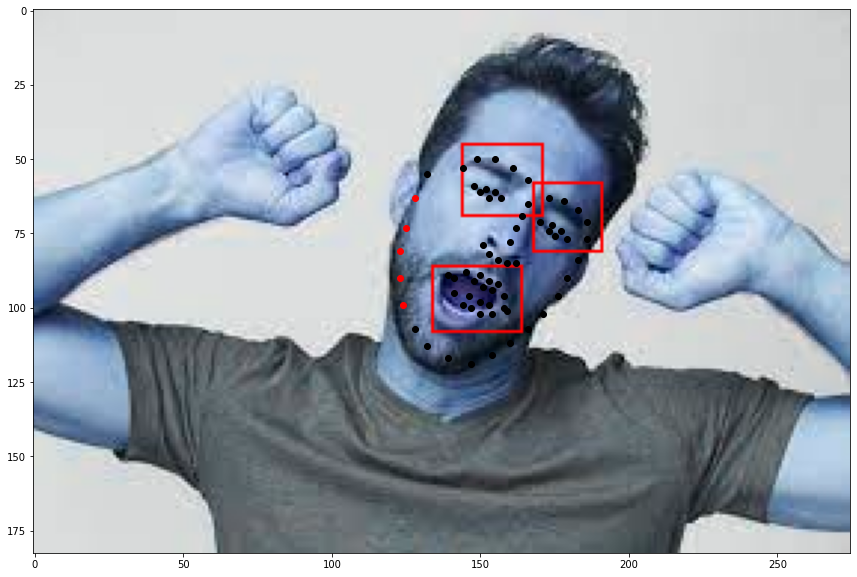

In [57]:
plt.figure(figsize=(18, 10))
plt.imshow(img)
for i in range(68):
    if i>=1 and i<=5:
        color = "red"
    else:
        color = "black"
    plt.scatter(s[i][0],s[i][1] , color=color)

In [17]:
crop_img = img[s[48][1]-5: s[57][1]+5 , s[48][0]-5 : s[54][0]+5]


In [18]:
# cv2.imwrite("crpeed.jpg",crop_img)

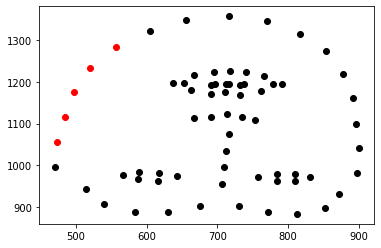

In [7]:
for i in range(68):
    if i>=1 and i<=5:
        color = "red"
    else:
        color = "black"
    plt.scatter(shape[i][0],shape[i][1] , color=color)